#AI - CA4 - ML
#Amirmahdi Farzane
#810100194

In [138]:
import os
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
import itertools

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/CA4-ML')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
from pandas import read_csv

df = read_csv('marketing_campaign.csv')

In [140]:
Education_dict = {'Graduation':1, 'PhD':2, 'Master':3, 'Basic' :4 , '2n Cycle' : 5}
df['Education'] = df['Education'].map(Education_dict)
Marital_Status_dict = {'Single':1, 'Married':2, 'Together':3, 'Divorced' :4}
df['Marital_Status'] = df['Marital_Status'].map(Marital_Status_dict)
df = df.drop('Dt_Customer' , axis = 1)
# df = df.drop('Marital_Status' , axis = 1)
# df = df.drop('Education' , axis = 1)

In [141]:
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoffee,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,NumPurchases,UsedCampaignOffer
0,0,5524,1957,1,1.0,58138.0,0,0,58,635.0,88,546,172,88,88.0,NaN,0,25,1
1,1,2174,1954,1,1.0,46344.0,1,1,38,NaN,1,6,2,1,6.0,5.0,0,6,0
2,2,4141,1965,1,3.0,71613.0,0,0,26,NaN,49,127,111,21,42.0,NaN,0,21,0
3,3,6182,1984,1,3.0,26646.0,1,0,26,11.0,4,20,10,3,5.0,6.0,0,8,0
4,4,5324,1981,2,2.0,58293.0,1,0,94,173.0,43,118,46,27,15.0,5.0,0,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,1,2.0,61223.0,0,1,46,709.0,43,182,42,118,247.0,5.0,0,18,0
2236,2236,4001,1946,2,3.0,64014.0,2,1,56,406.0,0,30,0,0,8.0,7.0,0,22,1
2237,2237,7270,1981,1,4.0,56981.0,0,0,91,908.0,48,217,32,12,24.0,6.0,0,19,1
2238,2238,8235,1956,3,3.0,69245.0,0,1,8,428.0,30,214,80,30,61.0,NaN,0,23,0


#Q1

In [142]:
df.describe()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoffee,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,NumPurchases,UsedCampaignOffer
count,2240.000000,2240.000000,2240.000000,2240.000000,2156.000000,2017.000000,2240.000000,2240.000000,2240.000000,2035.000000,2240.000000,2240.000000,2240.000000,2240.000000,2227.000000,2040.000000,2240.000000,2240.000000,2240.000000
mean,1119.500000,5592.159821,1968.805804,1.982143,2.261596,52297.080317,0.437946,0.506250,49.109375,304.239312,26.302232,166.950000,37.525446,27.062946,43.847777,5.326961,0.009375,14.862054,0.271875
std,646.776623,3246.662198,11.984069,1.257276,0.924144,25543.108215,0.563666,0.544538,28.962453,337.515534,39.773434,225.715373,54.628979,41.280498,51.897098,2.439349,0.096391,7.677173,0.445025
min,0.000000,0.000000,1893.000000,1.000000,1.000000,2447.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,559.750000,2828.250000,1959.000000,1.000000,2.000000,35340.000000,0.000000,0.000000,24.000000,23.000000,1.000000,16.000000,3.000000,1.000000,9.000000,3.000000,0.000000,8.000000,0.000000
50%,1119.500000,5458.500000,1970.000000,1.000000,2.000000,51369.000000,0.000000,0.000000,49.000000,177.000000,8.000000,67.000000,12.000000,8.000000,24.000000,6.000000,0.000000,15.000000,0.000000
75%,1679.250000,8427.750000,1977.000000,3.000000,3.000000,68316.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.000000,50.000000,33.000000,56.000000,7.000000,0.000000,21.000000,1.000000
max,2239.000000,11191.000000,1996.000000,5.000000,4.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,20.000000,1.000000,44.000000,1.000000


In [143]:
info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2240 non-null   int64  
 1   ID                 2240 non-null   int64  
 2   Year_Birth         2240 non-null   int64  
 3   Education          2240 non-null   int64  
 4   Marital_Status     2156 non-null   float64
 5   Income             2017 non-null   float64
 6   Kidhome            2240 non-null   int64  
 7   Teenhome           2240 non-null   int64  
 8   Recency            2240 non-null   int64  
 9   MntCoffee          2035 non-null   float64
 10  MntFruits          2240 non-null   int64  
 11  MntMeatProducts    2240 non-null   int64  
 12  MntFishProducts    2240 non-null   int64  
 13  MntSweetProducts   2240 non-null   int64  
 14  MntGoldProds       2227 non-null   float64
 15  NumWebVisitsMonth  2040 non-null   float64
 16  Complain           2240 

#Q2

In [144]:
df.isna().sum()

Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status        84
Income               223
Kidhome                0
Teenhome               0
Recency                0
MntCoffee            205
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds          13
NumWebVisitsMonth    200
Complain               0
NumPurchases           0
UsedCampaignOffer      0
dtype: int64

In [145]:
df.isna().sum()/2240

Unnamed: 0           0.000000
ID                   0.000000
Year_Birth           0.000000
Education            0.000000
Marital_Status       0.037500
Income               0.099554
Kidhome              0.000000
Teenhome             0.000000
Recency              0.000000
MntCoffee            0.091518
MntFruits            0.000000
MntMeatProducts      0.000000
MntFishProducts      0.000000
MntSweetProducts     0.000000
MntGoldProds         0.005804
NumWebVisitsMonth    0.089286
Complain             0.000000
NumPurchases         0.000000
UsedCampaignOffer    0.000000
dtype: float64

#Q3

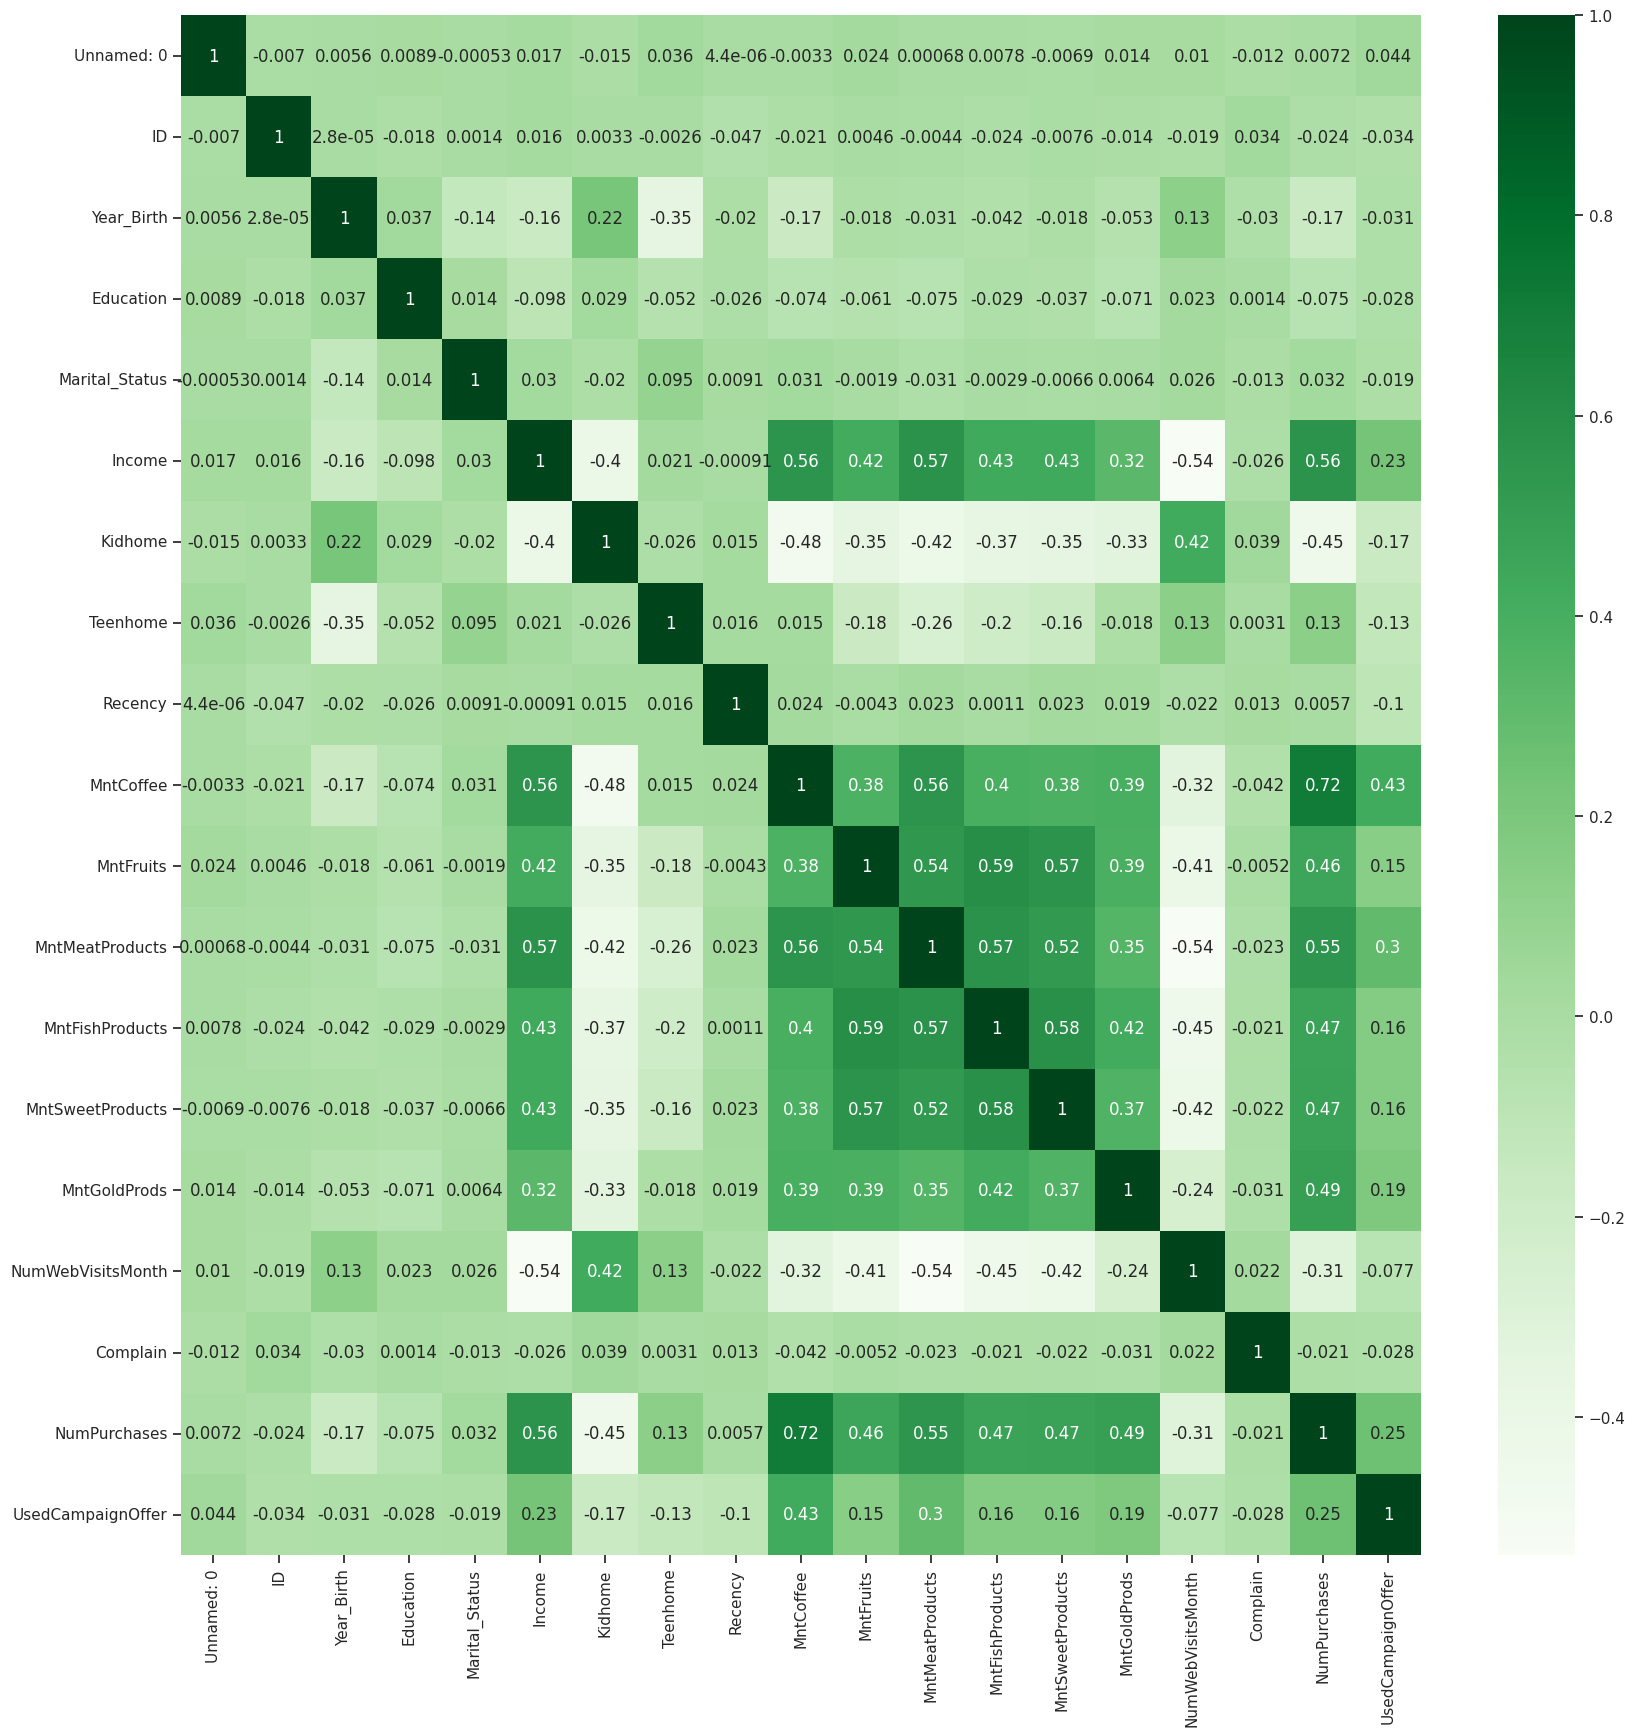

In [146]:
corr_matrix = df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, cmap="Greens",annot=True)
plt.show()

In [147]:
corr_num_purchases = corr_matrix['NumPurchases']
corr_num_purchases.sort_values(ascending = False)



NumPurchases         1.000000
MntCoffee            0.715164
Income               0.562603
MntMeatProducts      0.554229
MntGoldProds         0.493939
MntSweetProducts     0.472876
MntFishProducts      0.469454
MntFruits            0.455461
UsedCampaignOffer    0.251386
Teenhome             0.133163
Marital_Status       0.031676
Unnamed: 0           0.007169
Recency              0.005740
Complain            -0.020583
ID                  -0.023834
Education           -0.074614
Year_Birth          -0.168304
NumWebVisitsMonth   -0.309666
Kidhome             -0.447073
Name: NumPurchases, dtype: float64

#Q4

#Q5

In [148]:
def plot_scatter(second_property):
  sns.set_theme(style="ticks")
  pairs = list(map(list, zip(df.loc[:, 'NumPurchases'], df.loc[:, second_property])))
  sns.jointplot(x=[el[0] for el in pairs], y=[el[1] for el in pairs], kind="scatter", color="#4CB391")

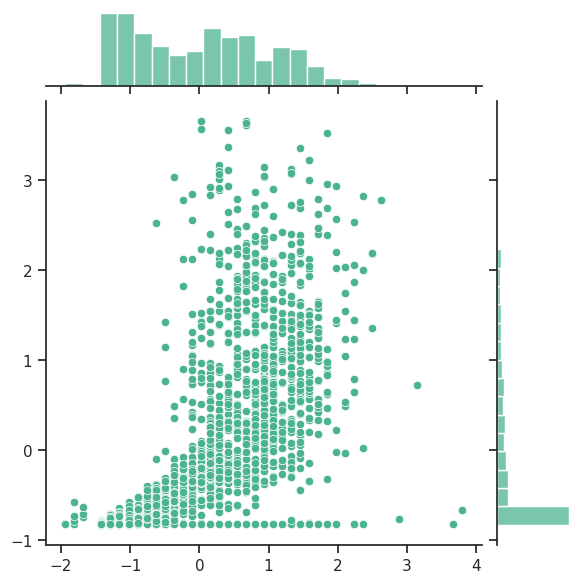

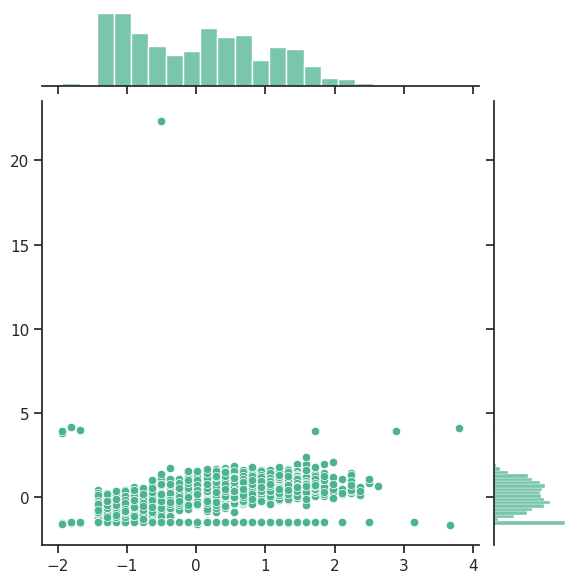

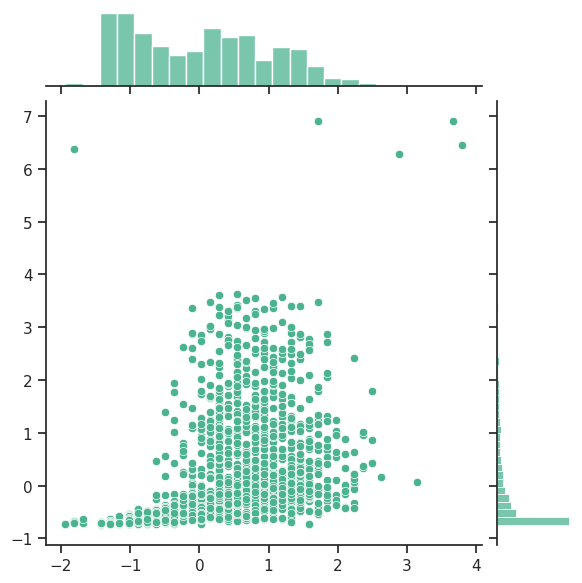

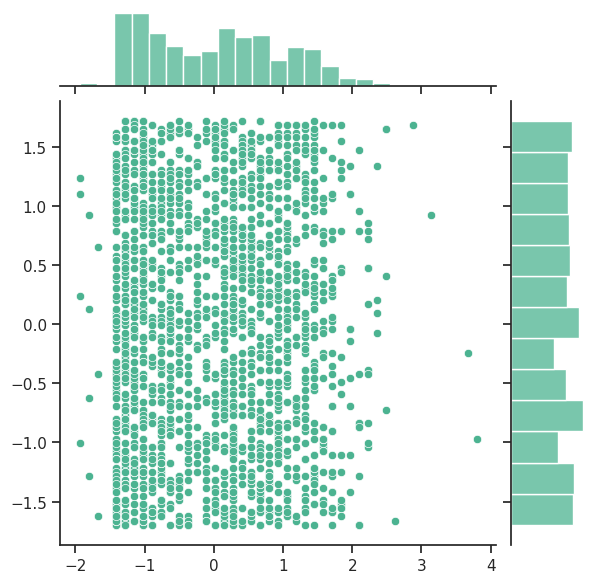

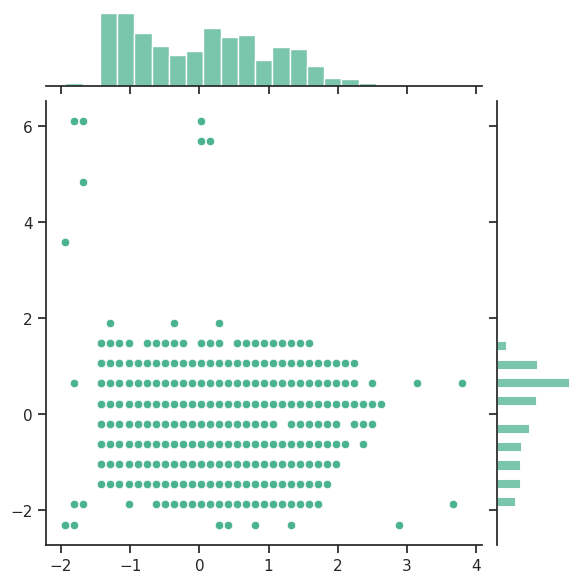

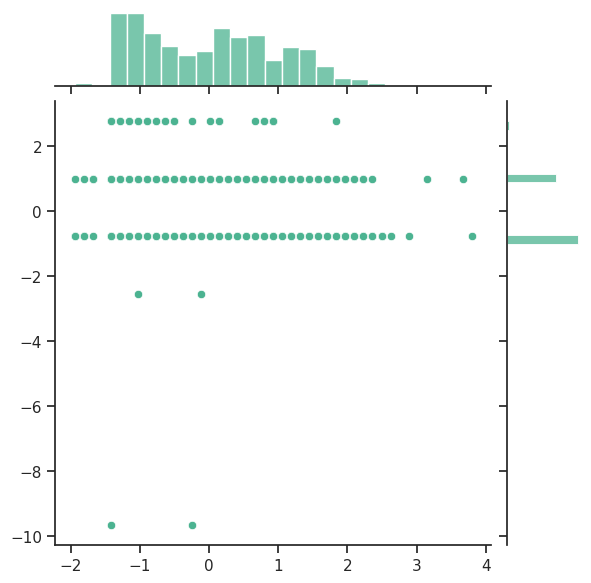

In [205]:
plot_scatter('MntCoffee') #.71
plot_scatter('Income') #.56
plot_scatter('MntMeatProducts') #.55
plot_scatter('Recency') #.0
plot_scatter('NumWebVisitsMonth') #-0.30
plot_scatter('Kidhome') #-0.44

As we see for example fpr MntCoffee corrolation is high and when MntCoffee increases number of purchases increase.

In contrast for

In [150]:
def plot_hexbin(second_property):
  sns.set_theme(style="ticks")
  pairs = list(map(list, zip(df.loc[:, 'NumPurchases'], df.loc[:, second_property])))
  sns.jointplot(x=[el[0] for el in pairs], y=[el[1] for el in pairs], kind="hex", color="#4CB391")

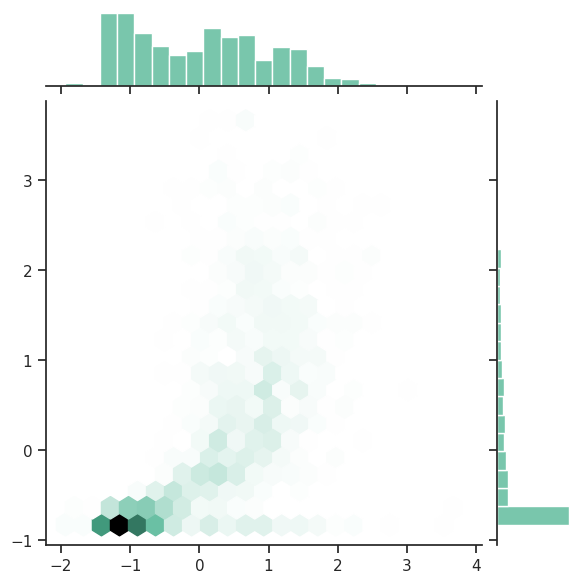

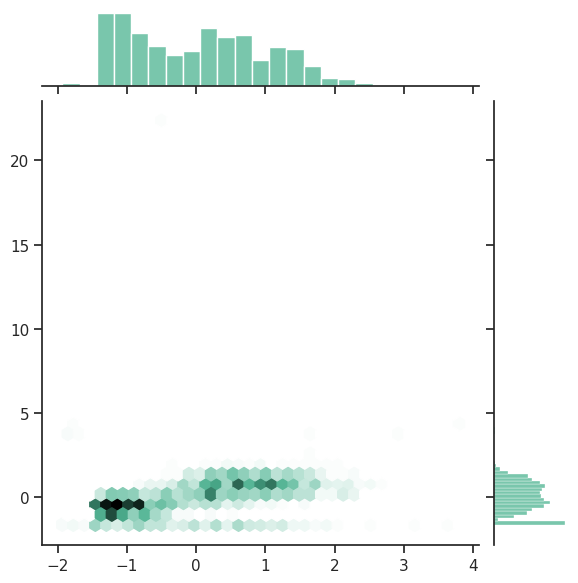

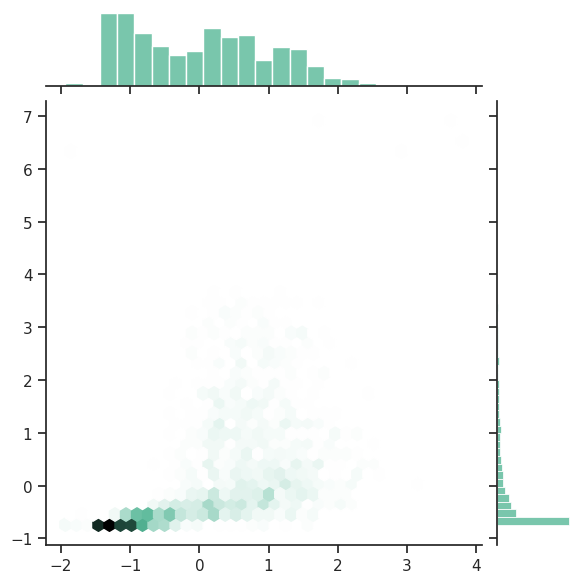

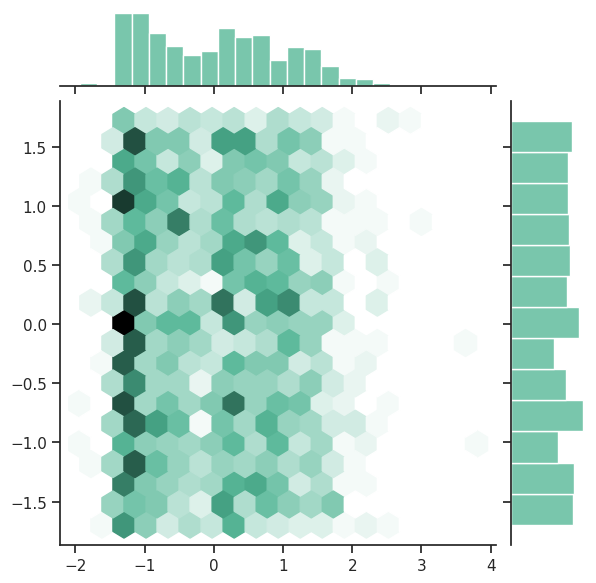

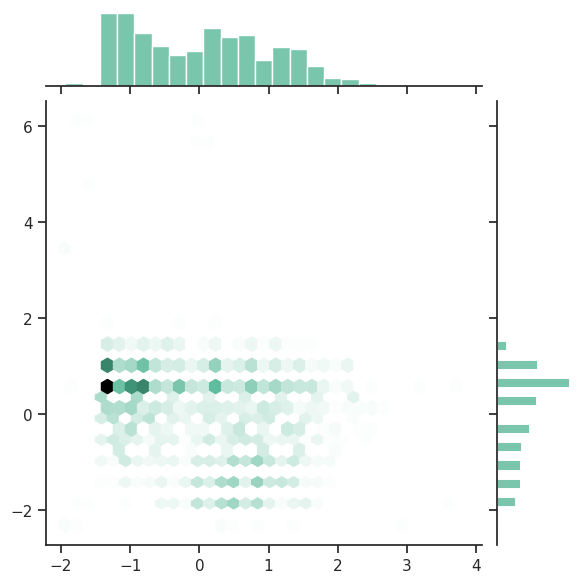

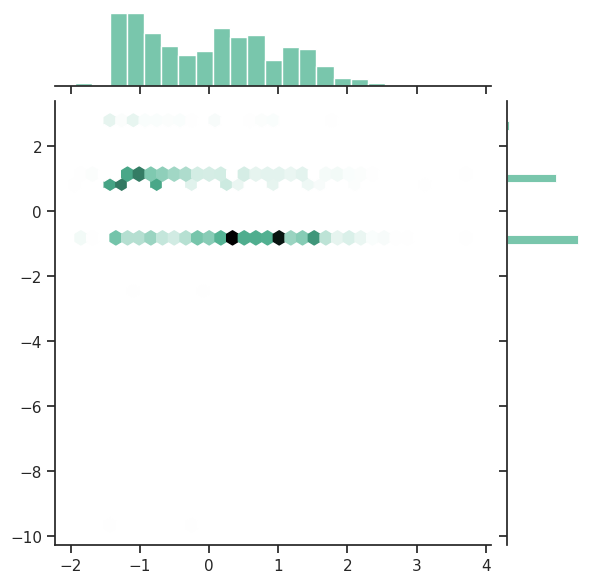

In [206]:
plot_hexbin('MntCoffee') #.71
plot_hexbin('Income') #.56
plot_hexbin('MntMeatProducts') #.55
plot_hexbin('Recency') #.0
plot_hexbin('NumWebVisitsMonth') #-0.30
plot_hexbin('Kidhome') #-0.44

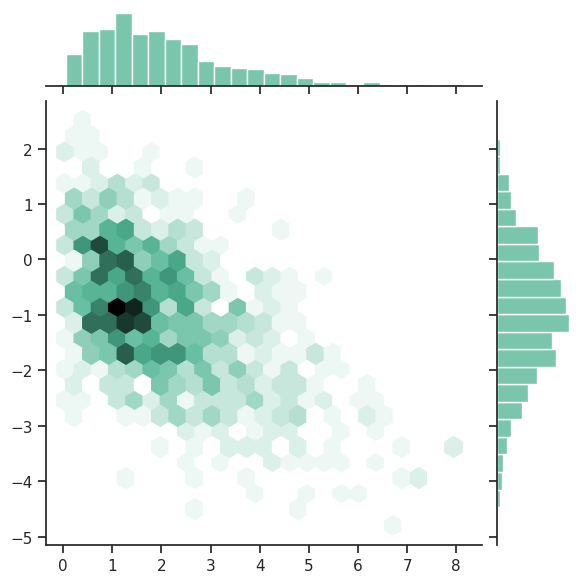

In [152]:
sns.set_theme(style="ticks")

rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)

sns.jointplot(x=x, y=y, kind="hex", color="#4CB391")

#Q7

**Replace with mean** :
  This is the most common method of imputing missing values of numeric columns. If there are outliers, then the mean will not be appropriate. In such cases, outliers need to be treated first.

**Replace with mode** :
  Mode is the most frequently occurring value. It is used in the case of categorical features.

**Replace with median** :
  The median is the middlemost value. It’s better to use the median value for imputation in the case of outliers.

**Replacing with the previous value – forward fill** :
  In some cases, imputing the values with the previous value instead of the mean, mode, or median is more appropriate. This is called forward fill. It is mostly used in time series data

**Deleting the entire row (listwise deletion)** :

  If a row has many missing values, you can drop the entire row. If every row has some (column) value missing, you might end up deleting the whole data.

#Q8
Income , MntCoffee , NumWebVisitsMonth


In [153]:
df['Income'] = df['Income'].fillna(df['Income'].mode()[0])
df['MntCoffee'] = df['MntCoffee'].fillna(df['MntCoffee'].mode()[0])
df['NumWebVisitsMonth'] = df['NumWebVisitsMonth'].fillna(df['NumWebVisitsMonth'].mode()[0])
df['MntGoldProds'] = df['MntGoldProds'].fillna(df['MntGoldProds'].mode()[0])
df['Marital_Status'] = df['Marital_Status'].fillna(df['Marital_Status'].mode()[0])

In [154]:
# df['Income'] = df['Income'].fillna(df['Income'].mean().astype(np.float64))
# df['MntCoffee'] = df['MntCoffee'].fillna(df['MntCoffee'].mean().astype(np.float64))
# df['NumWebVisitsMonth'] = df['NumWebVisitsMonth'].fillna(df['NumWebVisitsMonth'].mean().astype(np.float64))
# df['MntGoldProds'] = df['MntGoldProds'].fillna(df['MntGoldProds'].mean().astype(np.float64))
# df['Marital_Status'] = df['Marital_Status'].fillna(df['MntGoldProds'].mean().astype(np.float64))

In [155]:
# df['Income'] = df['Income'].fillna(0)
# df['MntCoffee'] = df['MntCoffee'].fillna(0)
# df['NumWebVisitsMonth'] = df['NumWebVisitsMonth'].fillna(0)
# df['MntGoldProds'] = df['MntGoldProds'].fillna(0)
# df['Marital_Status'] = df['Marital_Status'].fillna(0)

Mode is better because we have multiclass. Off corse are so near these parameters but deleting columns is not good idea because we waste a lot of information when a little part of data missed.

In [156]:
df.isna().sum()

Unnamed: 0           0
ID                   0
Year_Birth           0
Education            0
Marital_Status       0
Income               0
Kidhome              0
Teenhome             0
Recency              0
MntCoffee            0
MntFruits            0
MntMeatProducts      0
MntFishProducts      0
MntSweetProducts     0
MntGoldProds         0
NumWebVisitsMonth    0
Complain             0
NumPurchases         0
UsedCampaignOffer    0
dtype: int64

#Q9

**Normalization**

The goal of normalization is to transform features to be on a similar scale. This improves the performance and training stability of the model.

**Standardizing**

Data standardization transforms data into a consistent, standard format, making it easier to understand and use

Yes in this project we use both of them .

The first one because scale of features are various .

The second used for decision tree

In [157]:
df.describe()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoffee,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,NumPurchases,UsedCampaignOffer
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1119.500000,5592.159821,1968.805804,1.982143,2.251786,47837.370982,0.437946,0.506250,49.109375,276.579018,26.302232,166.950000,37.525446,27.062946,43.599107,5.476339,0.009375,14.862054,0.271875
std,646.776623,3246.662198,11.984069,1.257276,0.908004,27702.723639,0.563666,0.544538,28.962453,333.294153,39.773434,225.715373,54.628979,41.280498,51.848518,2.376258,0.096391,7.677173,0.445025
min,0.000000,0.000000,1893.000000,1.000000,1.000000,2447.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,559.750000,2828.250000,1959.000000,1.000000,2.000000,30066.500000,0.000000,0.000000,24.000000,12.000000,1.000000,16.000000,3.000000,1.000000,9.000000,4.000000,0.000000,8.000000,0.000000
50%,1119.500000,5458.500000,1970.000000,1.000000,2.000000,47521.000000,0.000000,0.000000,49.000000,129.000000,8.000000,67.000000,12.000000,8.000000,24.000000,6.000000,0.000000,15.000000,0.000000
75%,1679.250000,8427.750000,1977.000000,3.000000,3.000000,66387.750000,1.000000,1.000000,74.000000,459.000000,33.000000,232.000000,50.000000,33.000000,56.000000,7.000000,0.000000,21.000000,1.000000
max,2239.000000,11191.000000,1996.000000,5.000000,4.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,20.000000,1.000000,44.000000,1.000000


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2240 non-null   int64  
 1   ID                 2240 non-null   int64  
 2   Year_Birth         2240 non-null   int64  
 3   Education          2240 non-null   int64  
 4   Marital_Status     2240 non-null   float64
 5   Income             2240 non-null   float64
 6   Kidhome            2240 non-null   int64  
 7   Teenhome           2240 non-null   int64  
 8   Recency            2240 non-null   int64  
 9   MntCoffee          2240 non-null   float64
 10  MntFruits          2240 non-null   int64  
 11  MntMeatProducts    2240 non-null   int64  
 12  MntFishProducts    2240 non-null   int64  
 13  MntSweetProducts   2240 non-null   int64  
 14  MntGoldProds       2240 non-null   float64
 15  NumWebVisitsMonth  2240 non-null   float64
 16  Complain           2240 

In [159]:
df = (df - df.min())/(df.max() - df.min())
df = (df-df.mean())/df.std()

#Q10
For objects we extract features of each object and use those for prediction.
And for string we must map a integer fro each string because our model get numbers as input.

No we don't need all of them .Just strings must be mapped to integer other parts are number and are usable for training.

#Q11
Yes we can delet columns with a lot of empty values beacause the information about all examples is not enough and any method despite delet can't give appropriate information about data.

And when corrolation is low or less than zero we can delet column because it is not appropriate for training




#Q12
Ratio of test and train changes from 80% - 20% to 70% - 30%(train-test).
Based on our problem we can change ratios.

We can use data split function in libraries .This function split test and train data after read all of them from one folder .


And we can make train and test folder at the first.
Anyway first method is better because during process we split data and

#Q13
 validation set set is a data-set of examples used to fine tune the hyperparameters of a classifier. We prevent overfitting on train set and we change hyperparameters to get better result on validation set.

#Q14
k-fold cross-validation is a technique for evaluating predictive models.

 The dataset is divided into k subsets or folds.

  The model is trained and evaluated k times, using a different fold as the validation set each time.
  
   Performance metrics from each fold are averaged to estimate the model's

As we see above , MntCoffe , Income and MntMeatProducts have higher impact on number of purchases. Other sorted.

# Linear Regression

Main form of simple linear regression function:
$$f(x) = \alpha x + \beta$$

here we want to find the bias ($\alpha$) and slope($\beta$) by minimizing the derivation of the Residual Sum of Squares (RSS) function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in terms of $\alpha$ and $\beta$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \beta = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$
$$ \hat{\beta} = y - \hat{a} x$$



#Q15
This is an optimization problem that we want to minimize error so we must user gradient to fine alpha and beta that minimize error.

#Q16
I used MntCoffee because this feature has higher corrolation and we can get better information for predicting.

Based on the above formula, implement the function below to compute the parameters of a simple linear regression

In [160]:
def simple_linear_regression(input_features):
    x_bar = sum([val[0] for val in input_features])/len(input_features)
    y_bar = sum([val[1] for val in input_features])/len(input_features)
    sum_over_mean = 0
    squared = 0
    for input_feature in input_features:
      sum_over_mean += ((input_feature[0] - x_bar) * (input_feature[1] - y_bar))
      squared += (input_feature[0] - x_bar)**2
    alpha = sum_over_mean / squared
    beta = y_bar - alpha*x_bar
    # print(alpha,beta)
    return alpha,beta

Now complete this `get_regression_predictions(...)` function to predict the value of given data based on the calculated intercept and slope

In [161]:
def get_regression_predictions(input_feature, bias, slope):
    # print(input_feature)
    return input_feature*bias + slope

Now that we have a model and can make predictions, let's evaluate our model using Root Mean Square Error (RMSE). RMSE is the square root of the mean of the squared differences between the residuals, and the residuals is just a fancy word for the difference between the predicted output and the true output.

Complete the following function to compute the RSME of a simple linear regression model given the input_feature, output, intercept and slope:

In [162]:
def get_root_mean_square_error(predicted_values, outputs):
    return np.sqrt(((predicted_values - outputs) ** 2).mean())

The RMSE has no bound, thus it becomes challenging to determine whether a particular RMSE value is considered good or bad without any reference point. Instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. The R2 score is formulated as below:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

Complete the following function to calculate the R2 score of a given input_feature, output, bias, and slope:

In [163]:
def get_r2_score(predicted_values, outputs):
    y_bar = (sum(outputs)/len(outputs))
    return (1 - (sum((predicted_values - outputs)**2)) / sum((outputs - y_bar)**2))

Now calculate the fitness of the model.
Remember to provide explanation for the outputs in your code!

In [164]:
def predict(feature):
  designated_feature_list = list(map(list, zip(df.loc[:, feature], df.loc[:, 'NumPurchases'])))
  alpha , beta = simple_linear_regression(input_features = designated_feature_list)
  X = [x[0] for x in designated_feature_list]
  Y = [x[1] for x in designated_feature_list]
  predicted_values = get_regression_predictions(np.array(X), bias = alpha, slope = beta)
  rmse = get_root_mean_square_error(predicted_values, Y)
  r2_score = get_r2_score(predicted_values, np.array(Y))
  print("Result for " , str(feature))
  print("RMS : ",rmse)
  print("R2-score : " , r2_score)
  print("\n")

In [165]:
predict('MntCoffee')
predict('Income')
predict('MntMeatProducts')
predict('Recency')
predict('NumWebVisitsMonth')
predict('Kidhome')

Result for  MntCoffee
RMS :  0.7521429036496232
R2-score :  0.43402838659066145


Result for  Income
RMS :  0.8786423931703407
R2-score :  0.22764274257682293


Result for  MntMeatProducts
RMS :  0.8321783756057778
R2-score :  0.3071698520009062


Result for  Recency
RMS :  0.9997602883593076
R2-score :  3.295195896901859e-05


Result for  NumWebVisitsMonth
RMS :  0.9585481497335413
R2-score :  0.08077507637291281


Result for  Kidhome
RMS :  0.8942978587354941
R2-score :  0.19987414081682042




#Q17

**RSS**

The residual sum of squares (RSS) measures the level of variance in the error term, or residuals, of a regression model. The smaller the residual sum of squares, the better model fits data; the greater the residual sum of squares, the poorer model fits data.The formula mentioened above.

**MSE**

Mean Squared Error (MSE) measures the amount of error in a statistical model. Evaluate the mean squared difference between observed and predicted values. If the model has no errors, the MSE is zero. Its value increases as the model error increases

**RMSE**

Root mean square error is one of the most commonly used measures for evaluating the quality of predictions. It shows how far predictions fall from measured true values using Euclidean distance

**R2-score**

R2-squared is a statistical measure that indicates how much of the variation of a dependent variable is explained by an independent variable in a regression model. The formula mentioened above.

#Q18
More corrolation , more R2-score and more accurate model.

# Multiple Regression

Multiple regression is a statistical technique that aims to model the relationship between a dependent variable and two or more independent variables.

Multiple regression with n independent variables is expressed as follows:

$$f(x) = \beta _{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + \beta_{3} x_{3} + \beta_{4} x_{4} + ... + \beta_{n} x_{n} + c $$

To optimize the model for accurate predictions, multiple regression commonly employs iterative algorithms such as gradient descent.

The main goal of the optimization process is to make our predictions as close as possible to the actual values.
We measure the prediction error using a cost function, usually denoted as $J(\beta)$.

$$ J(\beta)= \frac {1}{2m} Σ_{i=0}^{m-1}(y_i - (\hat \beta _{0} + \hat \beta_{1} x_{1} + \hat \beta_{2} x_{2} + \hat \beta_{3} x_{3} + \hat \beta_{4} x_{4} + ... + \hat \beta_{n} x_{n}) )^2  $$

Gradient descent iteratively adjusts the coefficients $(\beta_i)$ to minimize the cost function. The update rule for each coefficient is:

$$\beta_{i} = \beta _ {i} - \alpha \frac {∂J(\beta)}{∂\beta_{i}}$$

$$ \frac {∂J(\beta)}{∂\beta_{i}} = \frac {1}{m}Σ_{j=0}^{m-1}(y_j - (\hat \beta _{0} + \hat \beta_{1} x_{j1} + \hat \beta_{2} x_{j2} + \hat \beta_{3} x_{j3} + \hat \beta_{4} x_{j4} + ... + \hat \beta_{n} x_{jn})) x_{ji} $$



## Predicting output given regression weights

Based on the formula above and [np.dot()](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) method, complete this function to compute the predictions for an entire matrix of features given the matrix, bias, and the weights. Provide an explanation of np.dot method and the reasoning behind using this method in your code:

In [166]:
def predict_output(feature_matrix, weights, bias):
    return np.dot(feature_matrix , weights)+bias

## Computing the Derivative

As we saw, the cost function is the sum over the data points of the squared difference between an observed output and a predicted output.

Since the derivative of a sum is the sum of the derivatives, we can compute the derivative for a single data point and then sum over data points. We can write the squared difference between the observed output and predicted output for a single point as follows:

$$
(output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))^2
$$

With n feautures and a const , So the derivative will be :


$$
2 * (output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))
$$

The term inside the paranethesis is just the error (difference between prediction and output). So we can re-write this as:

$$2 * error*[feature_i] $$


That is, the derivative for the weight for feature i is the sum (over data points) of 2 times the product of the error and the feature itself. In the case of the constant then this is just twice the sum of the errors!

Recall that twice the sum of the product of two vectors is just twice the dot product of the two vectors. Therefore the derivative for the weight for feature_i is just two times the dot product between the values of feature_i and the current errors.


With this in mind, complete the following derivative function which computes the derivative of the weight given the value of the feature (over all data points) and the errors (over all data points).


In [167]:
def feature_derivative(errors, feature):
    return 2 * sum(errors * feature)

## Gradient Descent

Now we will write a function that performs a gradient descent. The basic premise is simple. Given a starting point we update the current weights by moving in the negative gradient direction. Recall that the gradient is the direction of increase and therefore the negative gradient is the direction of decrease and we're trying to minimize a cost function.


The amount by which we move in the negative gradient direction is called the 'step size'. We stop when we are 'sufficiently close' to the optimum. We define this by requiring that the magnitude (length) of the gradient vector to be smaller than a fixed 'tolerance'.


With this in mind, complete the following gradient descent function below using your derivative function above. For each step in the gradient descent we update the weight for each feature befofe computing our stopping criteria.

In [168]:
def regression_gradient_descent(feature_matrix, outputs, initial_weights, bias, step_size, tolerance):
    w = initial_weights.copy()
    b = bias
    while (True):
        errors = (outputs - (b + np.dot(feature_matrix,w)))/len(outputs)
        gradient = [0]*len(w)

        for i in range(len(w)):
            gradient[i] = (feature_derivative(errors, feature_matrix[:,i]))
            w[i] += step_size * gradient[i]

        b += step_size * (np.sum(errors))
        if abs(np.sum(gradient)) < tolerance:
            break
    return w,b



In [169]:
# Utility functions for multiple regression

def normalize_features(chosen_features, data_frame):
    # normalized_data_frame = data_frame.copy()
    for feature in chosen_features:
        data_frame[feature] = (data_frame[feature] - data_frame[feature].mean()) / data_frame[feature].std()
    return data_frame


def n_feature_regression(chosen_feature_matrix, target_matrix, keywords):
    initial_weights = keywords['initial_weights']
    step_size = keywords['step_size']
    tolerance = keywords['tolerance']
    bias = keywords['bias']

    weights, bias = regression_gradient_descent(chosen_feature_matrix, target_matrix, initial_weights, bias, step_size,
                                                tolerance)

    return weights, bias

def get_weights_and_bias(chosen_features,train_x,train_y):
    """
    Computes the weights and bias for a general n feature model.
    :param chosen_features:  list of features to perform multiple regression on
    :return: chosen_feature_matrix, computed weights and bias via regression
    """

    # ToDo
    #  Would selecting different initial weights make any difference?
    # Yes it may help model find better
    #  Explain your answer.
    #Because we start in diffrent place
    # And maybe we are near to the global optimum and faster get find that.
    # And prevent stuck in local optimum
    keywords = {
        'initial_weights': np.array([.0]*len(chosen_features)),
        'step_size': 1.e-2,
        'tolerance': 1.e-2,
        'bias': 0
    }

    chosen_feature_dataframe = train_x[chosen_features]
    # ToDo
    #  Why are the features normalized?
    #I sayed in report texts.
    chosen_feature_matrix = chosen_feature_dataframe.to_numpy()

    target_column = train_y
    target_matrix = target_column.to_numpy()

    train_weights, bias = n_feature_regression(chosen_feature_matrix, target_matrix, keywords)

    return chosen_feature_matrix, train_weights, bias

In [170]:
df['PurchaseRate'] = pd.cut(df['NumPurchases'], bins=[float('-inf'), df['NumPurchases'].median(), float('inf')], labels=['Low', 'High'])
Y = df['PurchaseRate']
X = df.drop('PurchaseRate' , axis=1)
X = X.drop('NumPurchases' , axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
classes = ["High" , "Low"]

## Two Feature Regression

In this part, you should choose 2 features and implement multiple regression on them :

In [171]:
chosen_features = ['Income','MntCoffee']
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
y_train2 = train['NumPurchases']
test =df[~msk]
y_test2 = test[['Income','MntCoffee']]
chosen_feature_matrix, train_weights, bias = get_weights_and_bias(chosen_features,train,y_train2)
preds = predict_output(np.array(y_test2), train_weights, bias)

print("RMS : ", get_root_mean_square_error(preds,np.array(test['NumPurchases'])))
print("R2-score : ",get_r2_score(preds,np.array(test['NumPurchases'])))

RMS :  0.7237061121043384
R2-score :  0.4141955336072124


We got better result on R2-score because we used more than one feature.

## Three Feature Regression

Now repeat the steps for 3 features

In [172]:
chosen_features = ['Income','MntCoffee','MntMeatProducts']
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
y_train2 = train['NumPurchases']
test =df[~msk]
y_test2 = test[['Income','MntCoffee','MntMeatProducts']]
chosen_feature_matrix, train_weights, bias = get_weights_and_bias(chosen_features,train,y_train2)
preds = predict_output(np.array(y_test2), train_weights, bias)

print("RMS : ", get_root_mean_square_error(preds,np.array(test['NumPurchases'])))
print("R2-score : ",get_r2_score(preds,np.array(test['NumPurchases'])))

RMS :  0.7377356424908397
R2-score :  0.4575237565672253


## Five Feature Regression

Finally, repeat the steps for 5 features

Explain the differences in the results and the reasoning behind these variations.

In [173]:
chosen_features = ['Income','MntCoffee','MntMeatProducts','MntSweetProducts','MntGoldProds']
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
y_train2 = train['NumPurchases']
test =df[~msk]
y_test2 = test[['Income','MntCoffee','MntMeatProducts','MntSweetProducts','MntGoldProds']]
chosen_feature_matrix, train_weights, bias = get_weights_and_bias(chosen_features,train,y_train2)
preds = predict_output(np.array(y_test2), train_weights, bias)

print("RMS : ", get_root_mean_square_error(preds,np.array(test['NumPurchases'])))
print("R2-score : ",get_r2_score(preds,np.array(test['NumPurchases'])))



RMS :  0.6735539167366935
R2-score :  0.5544304954372228


I choosed features based on corrulation because more related features give better information.

For more feactures we got better result than one feature.
For smaller tolerance we can get better result but anyway 5 features has 15% better accuracy than one feature.

#P3


In [174]:
def print_conf_matrix(real_labels , pred_labels , name):
    cm = confusion_matrix(real_labels, pred_labels)
    np.set_printoptions(precision=2)
    classes = ["High","Low"]
    plt.figure()
    cmap=plt.cm.Greens

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(name)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]),
                  horizontalalignment="center")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    plt.show()

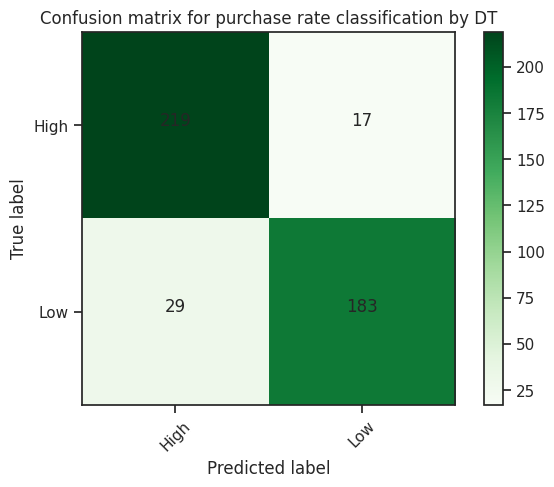

              precision    recall  f1-score   support

        High       0.88      0.93      0.90       236
         Low       0.92      0.86      0.89       212

    accuracy                           0.90       448
   macro avg       0.90      0.90      0.90       448
weighted avg       0.90      0.90      0.90       448



In [175]:
my_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
my_tree = my_tree.fit(X_train, y_train)
pred_labels_dt = my_tree.predict(X_test)
print_conf_matrix(y_test , pred_labels_dt , "Confusion matrix for purchase rate classification by DT")
print(classification_report(y_test, pred_labels_dt, labels=classes))

In [176]:
# tree.plot_tree(my_tree)

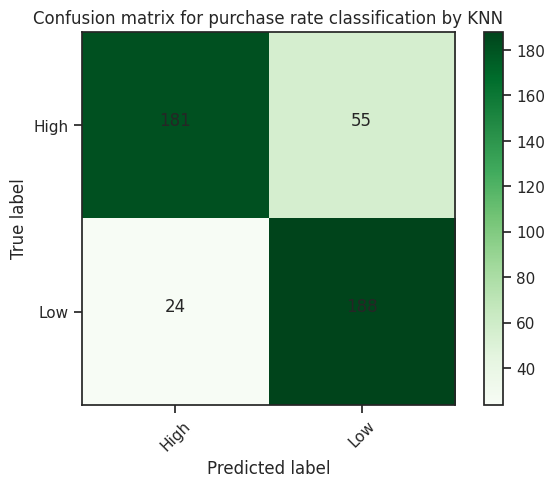

              precision    recall  f1-score   support

        High       0.88      0.77      0.82       236
         Low       0.77      0.89      0.83       212

    accuracy                           0.82       448
   macro avg       0.83      0.83      0.82       448
weighted avg       0.83      0.82      0.82       448



In [177]:
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_train, y_train)
pred_labels_knn = neigh.predict(X_test)
print_conf_matrix(y_test , pred_labels_knn , "Confusion matrix for purchase rate classification by KNN")
print(classification_report(y_test, pred_labels_knn, labels=classes))

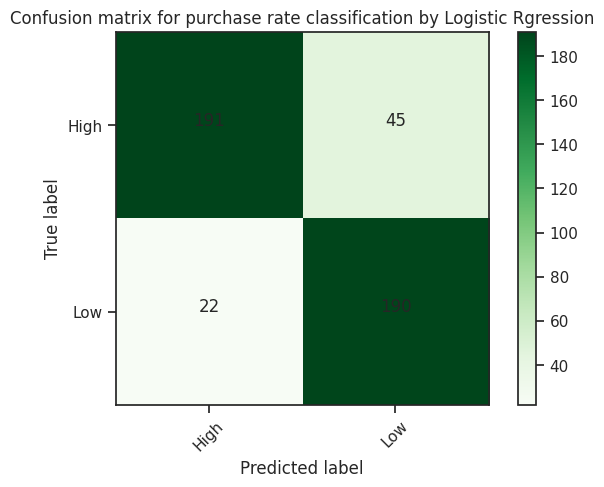

              precision    recall  f1-score   support

        High       0.90      0.81      0.85       236
         Low       0.81      0.90      0.85       212

    accuracy                           0.85       448
   macro avg       0.85      0.85      0.85       448
weighted avg       0.85      0.85      0.85       448



In [178]:
my_logistic = LogisticRegression(C=1.7575106248547894, random_state=0 , solver='saga').fit(X_train, y_train)
pred_labels_logistic = my_logistic.predict(X_test)
print_conf_matrix(y_test , pred_labels_logistic , "Confusion matrix for purchase rate classification by Logistic Rgression")
print(classification_report(y_test, pred_labels_logistic, labels=classes))

#Q19
As we see above knn has less accurate result and decision tree and logistic regression are same .

Recall for high label is lower than others so we can say misstakes happend more for detect High lable when models predict low .

And after that precision for low is the second worst . It means our models predict some wrong low label.

In [179]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition, datasets

#Q20

In [180]:
std_slc = StandardScaler()
pca = decomposition.PCA()

DT

In [208]:
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('dec_tree', my_tree)])
criterion = ['gini', 'entropy']
max_depth = [i for i in range(20)]
parameters = dict(    dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_train, y_train)
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: entropy
Best max_depth: 3
DecisionTreeClassifier(criterion='entropy', max_depth=3)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tr

KNN

In [182]:
k_range = list(range(1, 31))
parameters = dict(n_neighbors=k_range)

clf_GS = GridSearchCV(neigh, parameters)

# clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_train, y_train)
print(clf_GS.best_params_)

{'n_neighbors': 10}


Logistic

In [ ]:
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('logistic_Reg', my_logistic)])
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
parameters = dict(    logistic_Reg__C=C,
                      logistic_Reg__penalty=penalty,
                      logistic_Reg__solver=solver)
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_train, y_train)
print('Best Penalty:', clf_GS.best_estimator_.get_params()['logistic_Reg__penalty'])
print('Best C:', clf_GS.best_estimator_.get_params()['logistic_Reg__C'])
print('Best solver:', clf_GS.best_estimator_.get_params()['logistic_Reg__solver'])
print(clf_GS.best_estimator_.get_params()['logistic_Reg'])

#Q21

**Overfitting**

Overfitting occurs when a model learns the training data too well, capturing noise or random fluctuations in the data rather than the underlying patterns. As a result, the model performs well on the training data but fails to generalize effectively to new, unseen data.

**Underfitting**

Conversely, underfitting happens when a model is too simple to capture the underlying patterns in the training data. The model fails to learn the complexities of the data, resulting in poor performance on both the training data and new, unseen data.

For one and two linear regression with a lot of iterations overfitting occuers because R2-score is bad it means high variance and result of train is good so we have overfitting but for more features variance is less.

#Q22
I change method for missing values from mode to mean and accuracy of knn 1% increased. And median got simmilar result.
But i fill missed values by zero then accuracy of knn and logistic decrease 1%.

#Q23

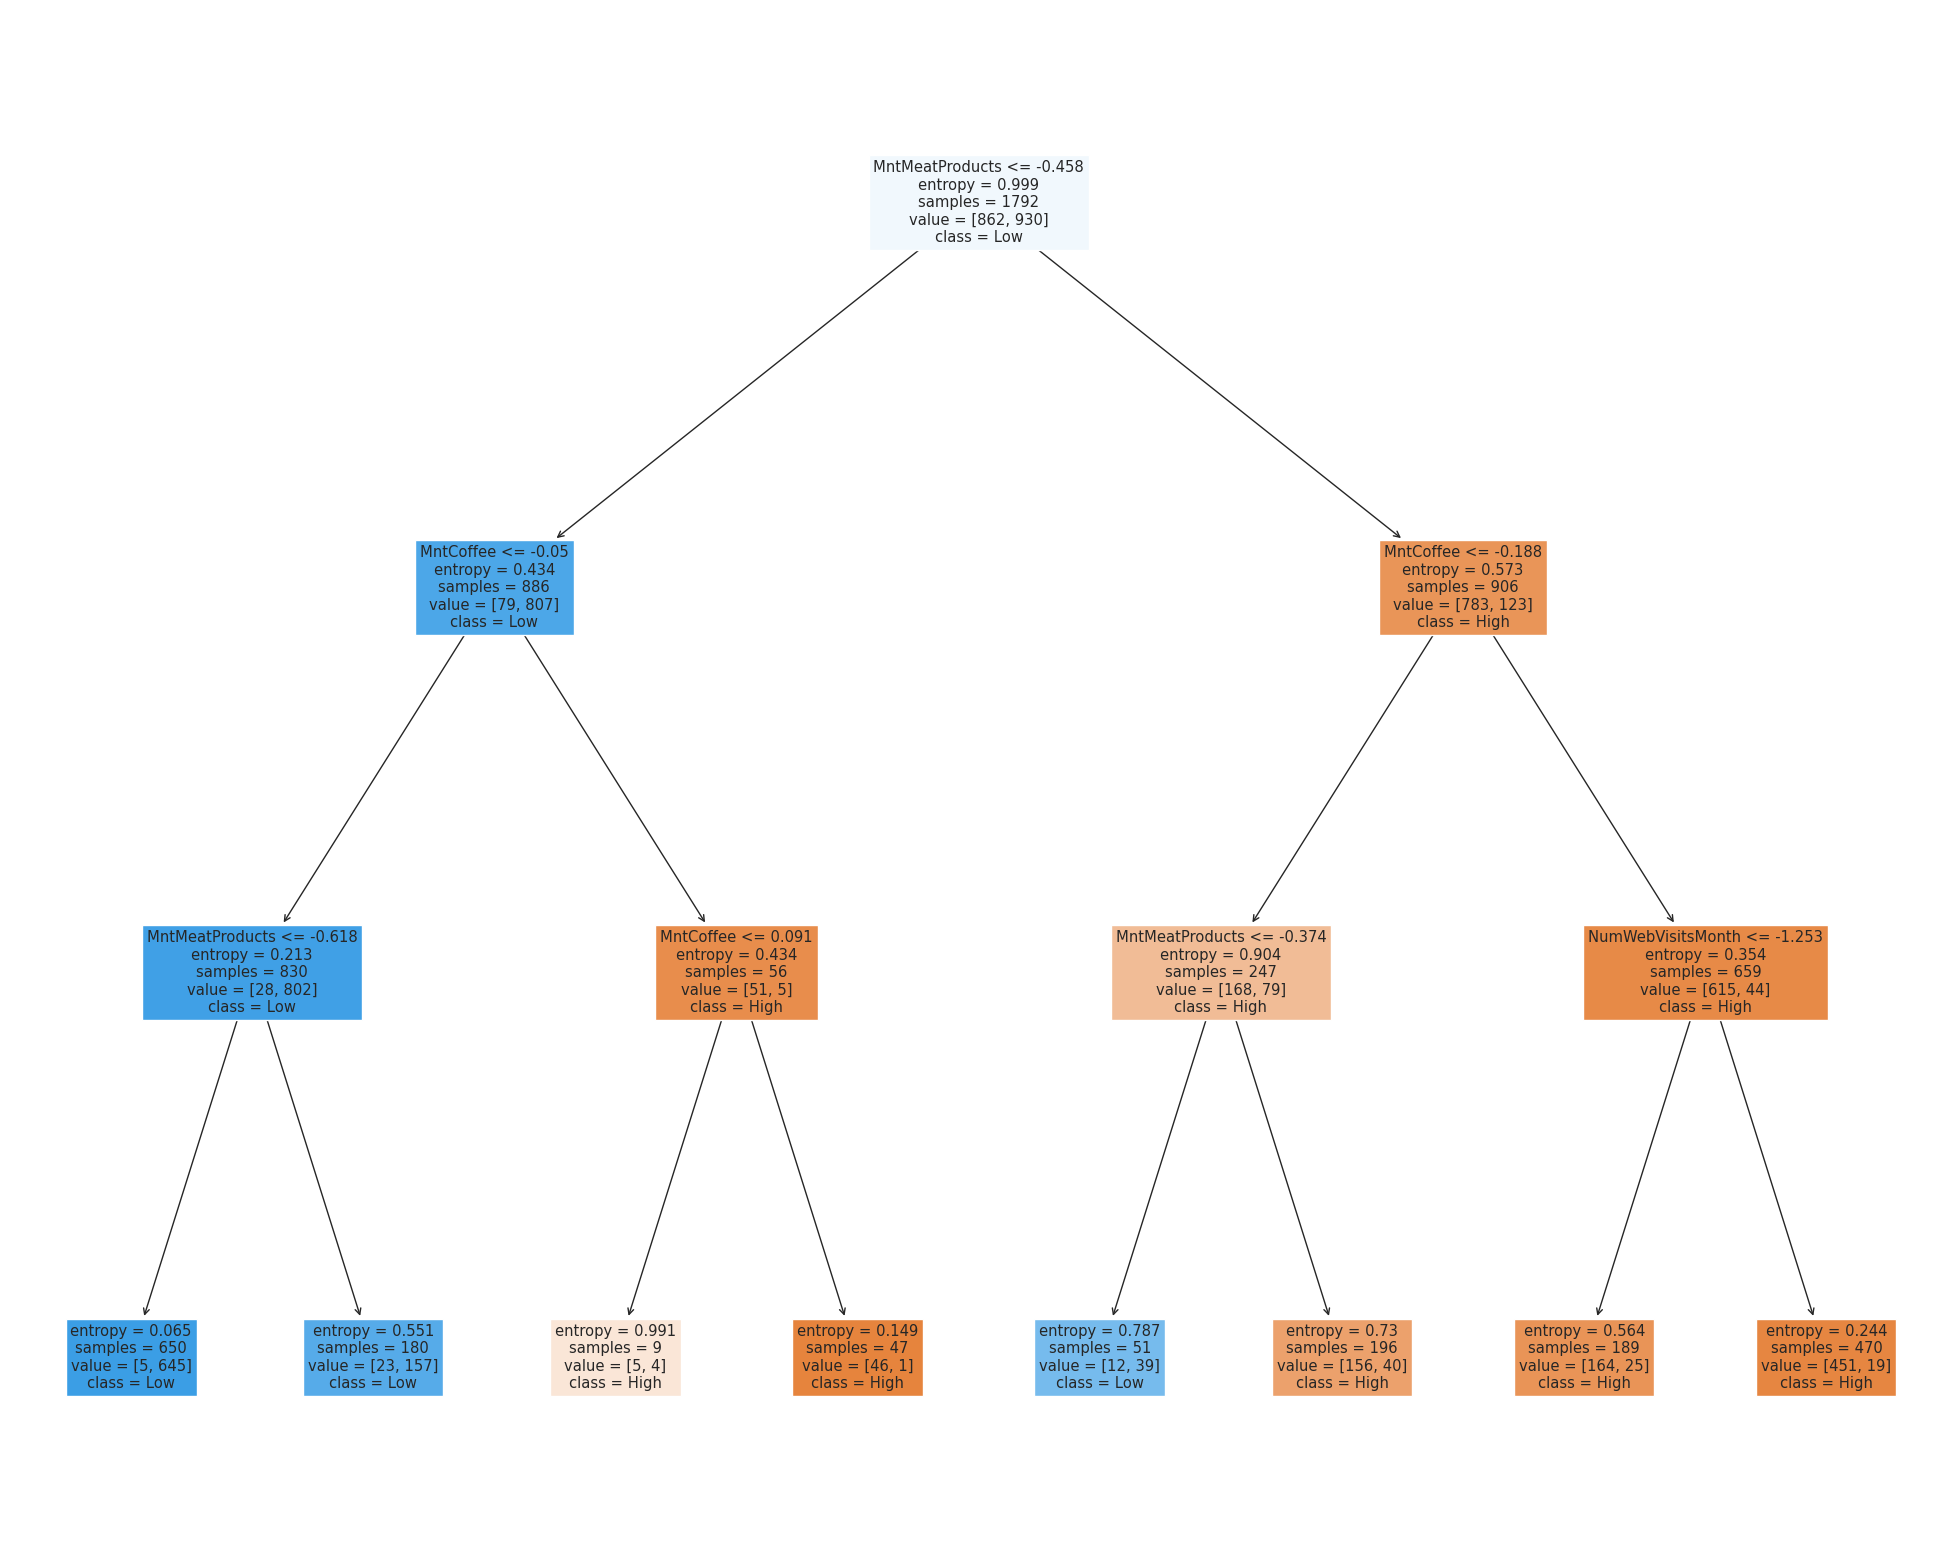

In [184]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(my_tree,
                   feature_names=list(df.columns),
                   class_names=classes,
                   filled=True)

#Q24
1 - Criteria for splitting (e.g., Gini or entropy)

2 - maximum depth

3 - minimum samples per leaf

4 - number of features considered for splitting

In [185]:

# explore random forest number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

def get_models_estimator():
 models = dict()
 n_trees = [10,20,50,100,200,300,500]
 for n in n_trees:
    models[str(n)] = RandomForestClassifier(n_estimators=n)
 return models



def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores



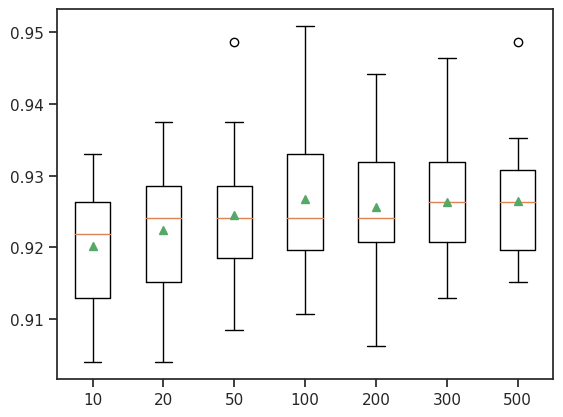

In [186]:
models = get_models_estimator()
results, names = list(), list()
for name, model in models.items():
 score = evaluate_model(model, X,Y)
 results.append(score)
 names.append(name)

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

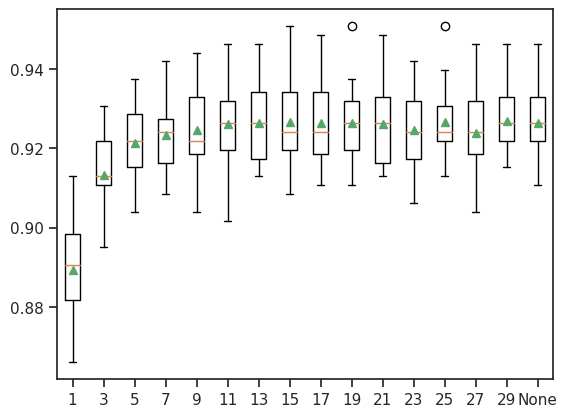

In [187]:
 def get_models_depth():
  models = dict()
  depths = [i for i in range(1,30,2)] + [None]
  for n in depths:
      models[str(n)] = RandomForestClassifier(max_depth=n)
  return models

models = get_models_depth()
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model,X,Y)
  results.append(scores)
  names.append(name)
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

#Q24
As we see above change number of esimators(trees) changes accuracy of model. It has normal distribiotion . So we dont need a lot of trees .Sounds 10 trees is enough.

I use boxplot because by change test and train there were many accuracy changes.So by above code and box plot we can get better result.

Max depth obviously has straight impact on accuracy but more than ... changes are small so and changes like sin function so about depth 10 is enough.

#Q25
Variance is the amount by which the performance of a predictive model changes when it is trained on different subsets of the training data. More specifically, variance is the variability of the model that how much it is sensitive to another subset of the training dataset.

Bias is simply defined as the inability of the model because of that there is some difference or error occurring between the model’s predicted value and the actual value.

I think random forest because consider diffrent trees so we prevent out model from high bias or high variance because result depends on diffrent trees but in decision tree maybe we see high bias or high variance for a tree and we can prevent that despite change tree.

Yes The accuracy of decision tree is near 90 but by random forest we got more than 92% so random forrest is better so we can say variance on result is lower than decision tree and also bias is less .


#Q26
By adding noise we can hide main information but because we added noises we know how manage data .For example we add a const number or use a function to change value of some parameters and follow paterns of data but dosen't show main information.

#Q27
The Laplace mechanism is commonly used for adding noise to numeric or continuous-valued functions.

It relies on the Laplace distribution, which is centered around zero and has heavy tails.

And the Exponential mechanism is used for adding noise to discrete or categorical-valued functions, such as when dealing with queries that return a specific category.

It is based on the exponential distribution and the notion of "sensitivity" or "distance" between possible outcomes.

#Q28
I choosed laplase noise.


In [188]:
noisy_df = read_csv('marketing_campaign.csv')

In [189]:
noisy_df['Education'] = noisy_df['Education'].map(Education_dict)
noisy_df['Marital_Status'] = noisy_df['Marital_Status'].map(Marital_Status_dict)
noisy_df = noisy_df.drop('Dt_Customer' , axis = 1)

In [190]:
noisy_df['Income'] = noisy_df['Income'].fillna(noisy_df['Income'].mode()[0])
noisy_df['MntCoffee'] = noisy_df['MntCoffee'].fillna(noisy_df['MntCoffee'].mode()[0])
noisy_df['NumWebVisitsMonth'] = noisy_df['NumWebVisitsMonth'].fillna(noisy_df['NumWebVisitsMonth'].mode()[0])
noisy_df['MntGoldProds'] = noisy_df['MntGoldProds'].fillna(noisy_df['MntGoldProds'].mode()[0])
noisy_df['Marital_Status'] = noisy_df['Marital_Status'].fillna(noisy_df['Marital_Status'].mode()[0])

In [191]:
def laplaceMechanism(x, epsilon):
    x +=  np.random.laplace(0, 1.0/epsilon, 1)[0]
laplaceMechanism(noisy_df,0.1)

In [192]:
noisy_df = (noisy_df - noisy_df.min())/(noisy_df.max() - noisy_df.min())

In [193]:
noisy_df['PurchaseRate'] = pd.cut(noisy_df['NumPurchases'], bins=[float('-inf'), noisy_df['NumPurchases'].median(), float('inf')], labels=['Low', 'High'])

In [194]:
Y_noisy = noisy_df['PurchaseRate']
X_noisy = noisy_df.drop('PurchaseRate' , axis=1)
X_train_noisy, X_test_noisy, y_train_noisy, y_test_noisy = train_test_split(X_noisy, Y_noisy, test_size=0.2, random_state=42)

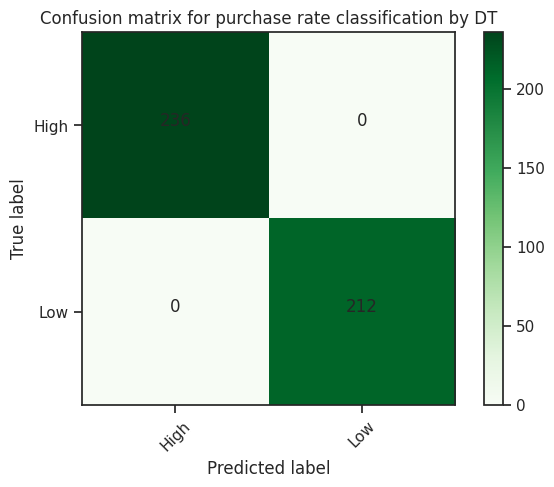

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       236
         Low       1.00      1.00      1.00       212

    accuracy                           1.00       448
   macro avg       1.00      1.00      1.00       448
weighted avg       1.00      1.00      1.00       448



In [196]:
my_tree_noisy = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
my_tree_noisy = my_tree_noisy.fit(X_train_noisy, y_train_noisy)
pred_labels_dt_noisy = my_tree_noisy.predict(X_test_noisy)
print_conf_matrix(y_test_noisy , pred_labels_dt_noisy , "Confusion matrix for purchase rate classification by DT")
print(classification_report(y_test_noisy, pred_labels_dt_noisy, labels=classes))

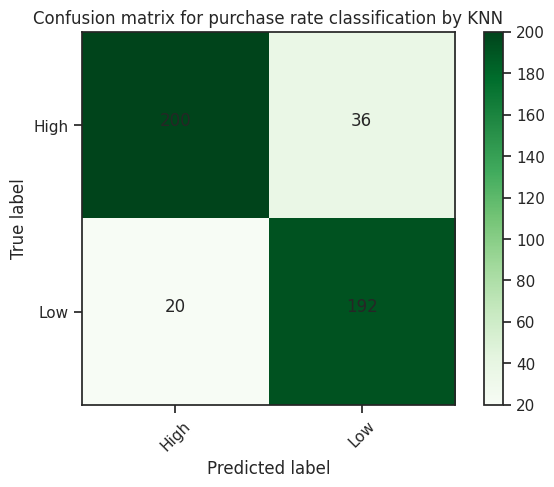

              precision    recall  f1-score   support

        High       0.91      0.85      0.88       236
         Low       0.84      0.91      0.87       212

    accuracy                           0.88       448
   macro avg       0.88      0.88      0.87       448
weighted avg       0.88      0.88      0.88       448



In [197]:
neigh_noisy = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_train_noisy, y_train_noisy)
pred_labels_knn = neigh.predict(X_test_noisy)
print_conf_matrix(y_test_noisy , pred_labels_knn , "Confusion matrix for purchase rate classification by KNN")
print(classification_report(y_test_noisy, pred_labels_knn, labels=classes))

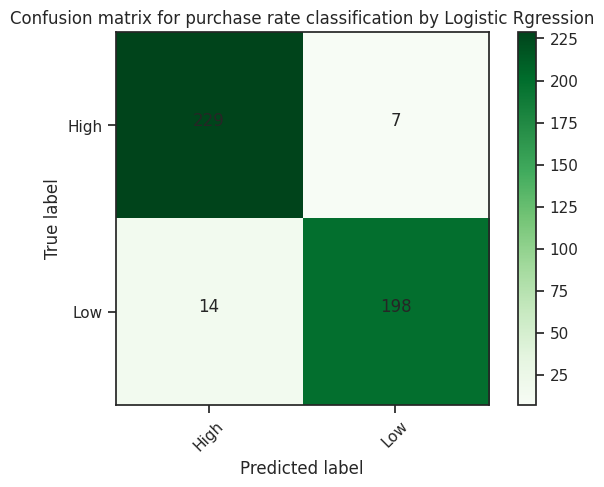

              precision    recall  f1-score   support

        High       0.94      0.97      0.96       236
         Low       0.97      0.93      0.95       212

    accuracy                           0.95       448
   macro avg       0.95      0.95      0.95       448
weighted avg       0.95      0.95      0.95       448



In [198]:
my_logistic_noisy = LogisticRegression(C=1.7575106248547894, random_state=0 , solver='saga').fit(X_train_noisy, y_train_noisy)
pred_labels_logistic_noisy = my_logistic_noisy.predict(X_test_noisy)
print_conf_matrix(y_test_noisy , pred_labels_logistic_noisy , "Confusion matrix for purchase rate classification by Logistic Rgression")
print(classification_report(y_test_noisy, pred_labels_logistic_noisy, labels=classes))

In all methods accuracy increased.

#Q29
Gradient Boosting is an ensemble learning technique used for both regression and classification tasks. It builds a predictive model in the form of an ensemble of weak learners, typically decision trees.

The fundamental idea behind Gradient Boosting is to combine multiple weak models to create a strong predictive model.

 The term "gradient" in Gradient Boosting refers to the fact that the method minimizes the loss function by iteratively adding weak models.

 Decision Tree is a standalone algorithm that creates a tree-like model for predictions. Boosting Tree refers to an ensemble model built by combining multiple decision trees through boosting techniques. Boosting enhances the predictive power by sequentially correcting errors made by the previous models

#Q30
XGBoost works by combining a number of weak learners to form a strong learner.

 A weak learner is a machine learning model that is only slightly better than random guessing. However, when weak learners are combined, they can form a strong learner that is much more accurate.

XGBoost works by training a number of decision trees.

 Each tree is trained on a subset of the data, and the predictions from each tree are combined to form the final prediction.

XGBoost optimizes a differentiable objective function using gradient descent, sequentially adding weak learners (trees) to the ensemble. Regularization, tree pruning, column subsampling, and other techniques are employed to create a robust and accurate predictive model.

In [199]:
df['PurchaseRate'] = pd.cut(df['NumPurchases'], bins=[float('-inf'), df['NumPurchases'].median(), float('inf')], labels=[0, 1])

#Q31


In [200]:
Rate_dict = {'High':1, 'Low':2}
# df['PurchaseRate'] = df['PurchaseRate'].map(Rate_dict)
Y = df['PurchaseRate']
X = df.drop('PurchaseRate' , axis=1)
X = X.drop('NumPurchases' , axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

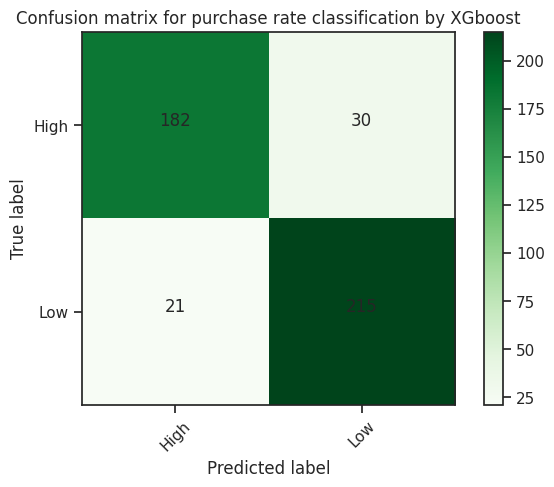

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       212
           1       0.88      0.91      0.89       236

    accuracy                           0.89       448
   macro avg       0.89      0.88      0.89       448
weighted avg       0.89      0.89      0.89       448



In [207]:

from xgboost import XGBClassifier

bst = XGBClassifier(colsample_bytree= 0.1, learning_rate= 0.1, max_depth= 10, min_child_weight= 5, subsample= 1, objective='binary:logistic')
bst.fit(X_train, y_train)
preds = bst.predict(X_test)
print_conf_matrix(y_test , preds , "Confusion matrix for purchase rate classification by XGboost")
print(classification_report(y_test, preds, labels=[0,1]))

In [203]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

PARAMETERS = {"subsample":[0.5,1],
              "colsample_bytree":[0.5,1],
              "max_depth":[i for i in range(1,11,3)],
              "min_child_weight":[1,3,5],
              "learning_rate":[0.1, 0.01]}

eval_set = [(X, Y)]

estimator = xgb.XGBClassifier(n_estimators=100,  n_jobs=-1, eval_metric='logloss',early_stopping_rounds=10)

model = GridSearchCV(estimator=estimator,param_grid=PARAMETERS,cv=3,scoring="neg_log_loss")

model.fit(X_train,y_train,eval_set=eval_set,verbose=0)

print(model.best_params_)

{'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 3, 'subsample': 1}


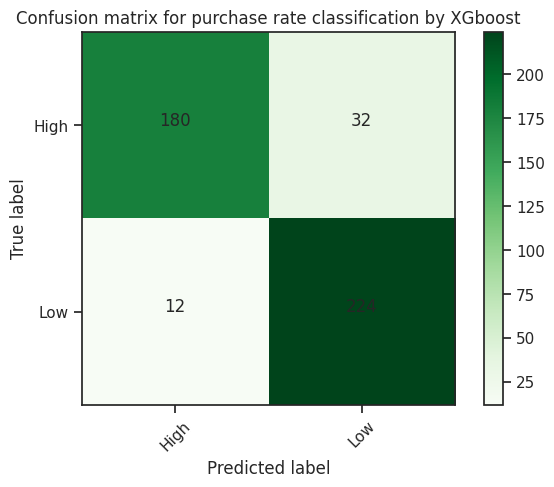

              precision    recall  f1-score   support

           0       0.94      0.85      0.89       212
           1       0.88      0.95      0.91       236

    accuracy                           0.90       448
   macro avg       0.91      0.90      0.90       448
weighted avg       0.90      0.90      0.90       448



In [204]:
bst = XGBClassifier(colsample_bytree= 0.5, learning_rate= 0.1, max_depth= 4, min_child_weight= 3, subsample= 1, objective='binary:logistic')
bst.fit(X_train, y_train)
preds = bst.predict(X_test)
print_conf_matrix(y_test , preds , "Confusion matrix for purchase rate classification by XGboost")
print(classification_report(y_test, preds, labels=[0,1]))

Result by this parameters a little be better.


In [210]:
%%shell
jupyter nbconvert --to html /content/AI_CA4.ipynb

[NbConvertApp] Converting notebook /content/AI_CA4.ipynb to html
[NbConvertApp] Writing 2522977 bytes to /content/AI_CA4.html
